In [17]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *
from copy import deepcopy

%load_ext autoreload
%autoreload 2

# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
model_new = deepcopy(model)    # Copy for no reference dependence later

from estimation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Estimating using the full sample** #
(using hazard rates from both before and after the reform)

In [18]:
model.par.full_sample_estimation = True
model.allocate()

# Model with reference dependence

In [19]:
# est_par = ['gamma', 'sigma', 'N', 'cost1', 'cost2', 'type_shares1', 'welfare'] # Parameters to estimate
# theta0 = [0.9, 0.1, 15, 100.0, 100.0, 0.1, 0.1]  # Initial guesses
# bounds = [(0, 50.0), (0.0, 5.0), (0,50), (0.0,1000.0), (0.0,1000.0), (0.0,1.0), (0.0,model.par.b3)] # Bounds for the parameters

est_par = ['gamma', 'sigma', 'cost1', 'cost2', 'type_shares1', 'welfare'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0, 0.1, 0.1]  # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,1000.0), (0.0,1000.0), (0.0,1.0), (0.0,model.par.b3)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds)

print("Optimization Results:")
print("---------------------")
print(f'{"Parameter":<15} {"Estimate":<15}')
for param, estimate in zip(est_par, est.x):
    print(f'{param:<15} {estimate:>15.3f}')
print(f'Objective:               {est.fun:.4f}')
print(f'Number of iterations:    {est.nit}')

/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  inv_c_marg[0] = (s/par.cost1)**(1/par.gamma)
/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  inv_c_marg[1] = (s/par.cost2)**(1/par.gamma)
/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  inv_c_marg[2] = (s/par.cost3)**(1/par.gamma)


Optimization Results:
---------------------
Parameter       Estimate       
gamma                     0.038
sigma                     1.843
cost1                   121.695
cost2                   388.603
type_shares1              0.068
welfare                   0.100
Objective:               0.2790
Number of iterations:    32


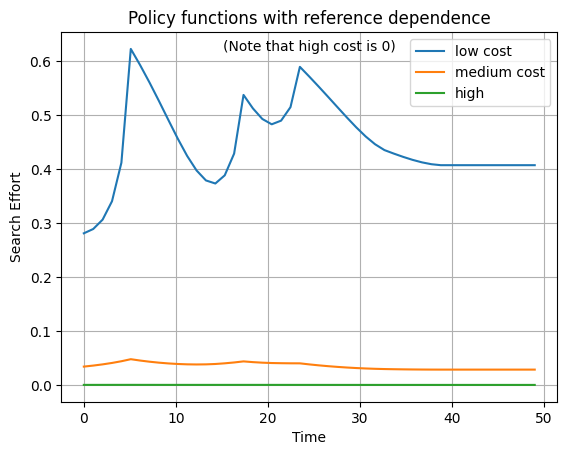

In [43]:
search_effort = solve_search_effort(model.par)
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort[0,:], label = 'low cost') 
plt.plot(time, search_effort[1,:], label = 'medium cost') 
plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.text(0.5, 0.96, '(Note that high cost is 0)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('Time')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Policy functions with reference dependence')
plt.grid(True)
plt.legend()
plt.show()

# **Estimating on hazard before the reform and forecasting on after**

In [20]:
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
model.par.full_sample_estimation = False
model.allocate()

# Model with reference dependence

In [21]:
# est_par = ['gamma', 'sigma', 'N', 'cost1', 'cost2', 'type_shares1', 'welfare'] # Parameters to estimate
# theta0 = [0.9, 0.1, 15, 100.0, 100.0, 0.1, 0.1]  # Initial guesses
# bounds = [(0, 50.0), (0.0, 5.0), (0,50), (0.0,1000.0), (0.0,1000.0), (0.0,1.0), (0.0,model.par.b3)] # Bounds for the parameters

est_par = ['gamma', 'sigma', 'cost1', 'cost2', 'type_shares1', 'welfare'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0, 0.1, 0.1]  # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,1000.0), (0.0,1000.0), (0.0,1.0), (0.0,model.par.b3)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds)

print("Optimization Results:")
print("---------------------")
print(f'{"Parameter":<15} {"Estimate":<15}')
for param, estimate in zip(est_par, est.x):
    print(f'{param:<15} {estimate:>15.3f}')
print(f'Objective:               {est.fun:.4f}')
print(f'Number of iterations:    {est.nit}')


Optimization Results:
---------------------
Parameter       Estimate       
gamma                     0.036
sigma                     1.980
cost1                   111.063
cost2                   391.209
type_shares1              0.042
welfare                   0.100
Objective:               0.1121
Number of iterations:    32


In [22]:
print(model.par.type_shares1)
print(model.par.type_shares2)
print(model.par.type_shares3)

0.042165090480109566
0.9578349095198905
0.0


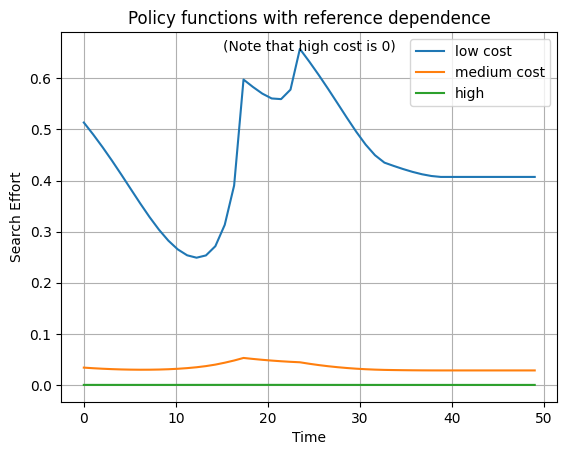

In [23]:
search_effort = solve_search_effort(model.par)
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort[0,:], label = 'low cost') 
plt.plot(time, search_effort[1,:], label = 'medium cost') 
plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.text(0.5, 0.96, '(Note that high cost is 0)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('Time')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Policy functions with reference dependence')
plt.grid(True)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


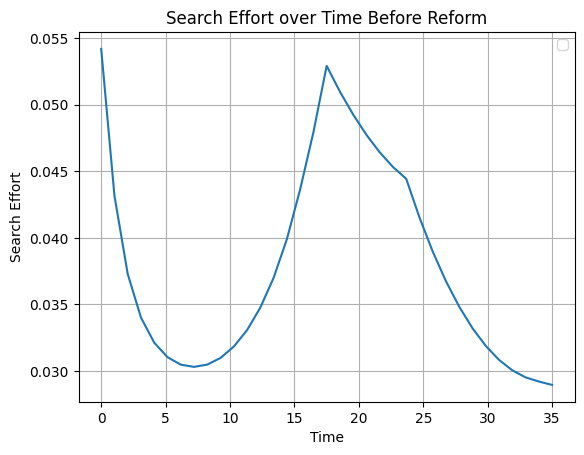

In [24]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time Before Reform')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


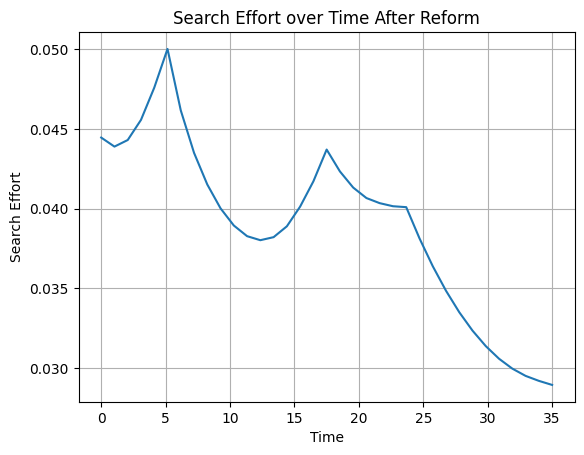

In [25]:
model.par.b1 = 342.0/675.0      # Value after reform
model.par.b2 = 171.0/675.0      # Value after reform

model.allocate()
s_forecast = model.solve()

# Now plotting s_forecast
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, s_forecast, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time After Reform')
plt.grid(True)
plt.show()

### Mean Square error

In [26]:
true_data_outofsample = model.data.moments_after
true_data_insample = model.data.moments_before
# Get the mean square errors
mse_eta1_outofsample = np.mean((true_data_outofsample - s_forecast)**2)
mse_eta1_insample = np.mean((true_data_insample - sim)**2)
print(f"The mean square error from the reference dependent model out of sample is {mse_eta1_outofsample:.9f}")
print(f"The mean square error from the reference dependent model in sample is {mse_eta1_insample:.9f}")


The mean square error from the reference dependent model out of sample is 0.000096000
The mean square error from the reference dependent model in sample is 0.000153045


# Model with **NO** reference dependence

In [35]:
from Model import ReferenceDependenceClass
model_new = ReferenceDependenceClass()

model_new.par.eta = 0.0     # Removes reference dependence
model_new.par.full_sample_estimation = False
model_new.allocate()

est_par = ['gamma', 'cost1', 'cost2', 'cost3', 'type_shares1', 'type_shares3', 'Welfare'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0, 0.1, 0.1, 0.1] # Initial guesses
bounds = [(0, 50.0), (0.0, 500.0), (0.0,500.0), (0.0,500.0), (0,1), (0,1), (0,model.par.b3)] # Bounds for the parameters

est = method_simulated_moments(model_new, est_par,theta0,bounds)

print("Optimization Results:")
print("---------------------")
print(f'{"Parameter":<15} {"Estimate":<15}')
for param, estimate in zip(est_par, est.x):
    print(f'{param:<15} {estimate:>15.3f}')
print(f'Objective:               {est.fun:.4f}')
print(f'Number of iterations:    {est.nit}')

/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:40: RuntimeWarning: invalid value encountered in scalar power
  inv_c_marg[0] = (s/par.cost1)**(1/par.gamma)
/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:41: RuntimeWarning: invalid value encountered in scalar power
  inv_c_marg[1] = (s/par.cost2)**(1/par.gamma)
/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:42: RuntimeWarning: invalid value encountered in scalar power
  inv_c_marg[2] = (s/par.cost3)**(1/par.gamma)


Optimization Results:
---------------------
Parameter       Estimate       
gamma                     0.900
cost1                     0.100
cost2                   100.000
cost3                   100.000
type_shares1              0.100
type_shares3              0.100
Welfare                   0.100
Objective:               nan
Number of iterations:    1


In [36]:
print(model_new.par.type_shares1)
print(model_new.par.type_shares2)
print(model_new.par.type_shares3)

0.1
0.8
0.1


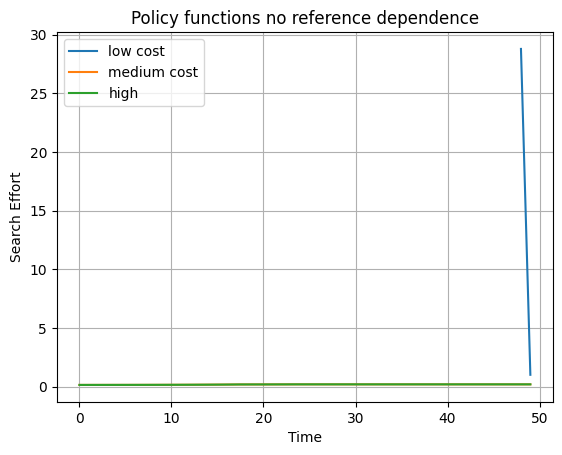

In [37]:
search_effort_new = solve_search_effort(model_new.par)
time = np.linspace(0, model_new.par.T, model_new.par.T)
plt.plot(time, search_effort_new[0,:], label = 'low cost') 
plt.plot(time, search_effort_new[1,:], label = 'medium cost') 
plt.plot(time, search_effort_new[2,:], label = 'high' ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Policy functions no reference dependence')
plt.grid(True)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


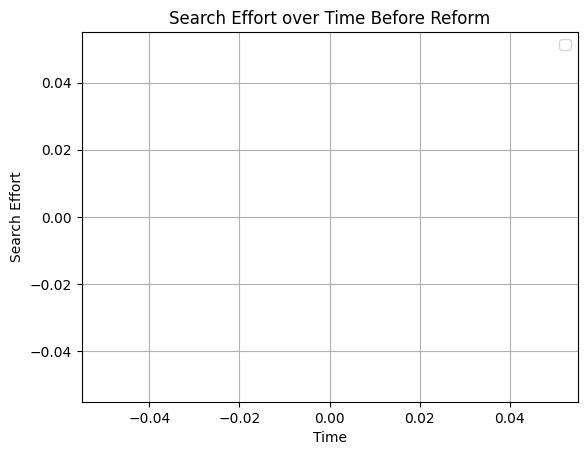

In [38]:
sim_new = sim_search_effort(model_new.par)
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time Before Reform')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


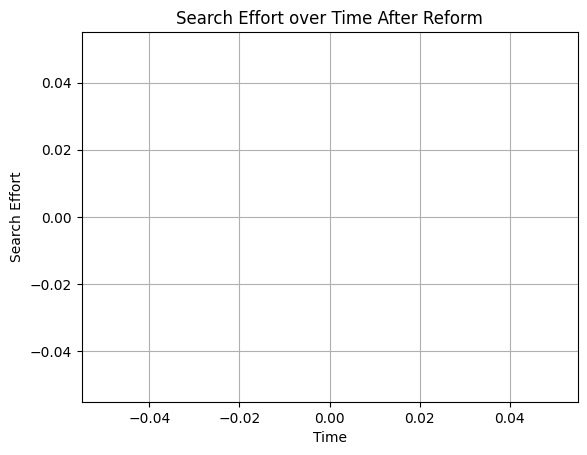

In [39]:
model_new.par.b1 = 342.0/675.0      # Value after reform
model_new.par.b2 = 171.0/675.0      # Value after reform

model_new.allocate()
s_forecast_new = model_new.solve()


# Now plotting s_forecast
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time After Reform')
plt.grid(True)
plt.show()

### Mean Square Error

In [40]:
true_data_outofsample = model_new.data.moments_after
true_data_insample = model_new.data.moments_before

# Get the mean square errors
mse_eta0_outofsample = np.mean((true_data_outofsample - s_forecast_new)**2)
mse_eta0_insample = np.mean((true_data_insample - sim_new)**2)

# Comparison out of sample
comparison1 = "smaller" if mse_eta1_outofsample < mse_eta0_outofsample else "bigger" if mse_eta1_outofsample > mse_eta0_outofsample else "equal"
comparison2 = "WITH reference dependence" if mse_eta1_outofsample < mse_eta0_outofsample else "WITHOUT reference dependence" 

# Comparison in sample
comparison3 = "smaller" if mse_eta1_insample < mse_eta0_insample else "bigger" if mse_eta1_insample > mse_eta0_insample else "equal"
comparison4 = "WITH reference dependence" if mse_eta1_insample < mse_eta0_insample else "WITHOUT reference dependence"


print("In sample: ")
print("-" * 100)
print(f"The mean square error from the model \033[1mwith\033[0m reference dependence is {mse_eta1_insample}")
print(f"The mean square error from the model \033[1mwithout\033[0m reference dependence is {mse_eta0_insample}")
print(f"The mean square error for the model \033[1mwith\033[0m reference dependence is \033[1m{comparison3}\033[0m than the model without.")
print(f"Best model: \033[1m{comparison4}\033[0m.")
print("-" * 100)



print("Out of sample:")
print("-" * 100)
print(f"The mean square error from the model \033[1mwith\033[0m reference dependence is {mse_eta1_outofsample}")
print(f"The mean square error from the model \033[1mwithout\033[0m reference dependence is {mse_eta0_outofsample}")
print(f"The mean square error for the model \033[1mwith\033[0m reference dependence is \033[1m{comparison1}\033[0m than the model without.")
print(f"Best model: \033[1m{comparison2}\033[0m.")
print("-" * 100)

In sample: 
----------------------------------------------------------------------------------------------------
The mean square error from the model with reference dependence is 0.0001530449411400008
The mean square error from the model without reference dependence is nan
The mean square error for the model with reference dependence is equal than the model without.
Best model: WITHOUT reference dependence.
----------------------------------------------------------------------------------------------------
Out of sample:
----------------------------------------------------------------------------------------------------
The mean square error from the model with reference dependence is 9.5999532362416e-05
The mean square error from the model without reference dependence is nan
The mean square error for the model with reference dependence is equal than the model without.
Best model: WITHOUT reference dependence.
----------------------------------------------------------------------------

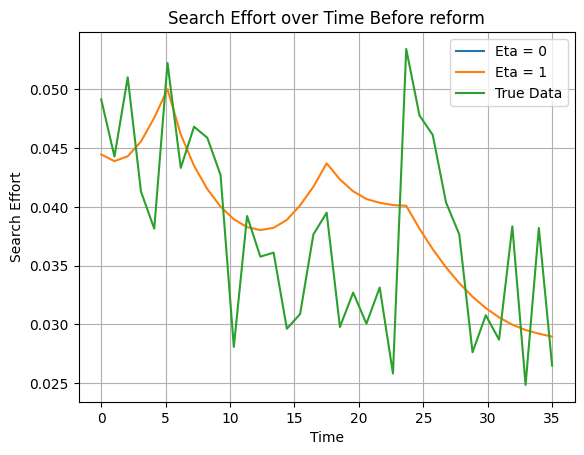

In [41]:
after = model_new.data.moments_after

time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)     # x-axis
plt.plot(time, s_forecast_new, label='Eta = 0')                     # Model with no reference dependence
plt.plot(time, s_forecast, label='Eta = 1')                         # Model with reference dependence
plt.plot(time, after, label='True Data')                        # True data
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time Before reform')
plt.grid(True)
plt.show()

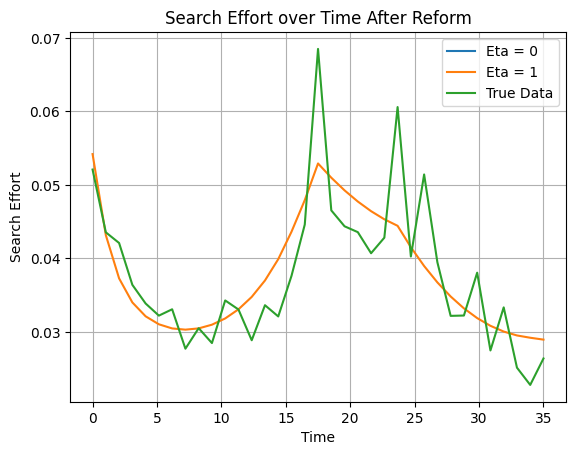

In [42]:
before = model_new.data.moments_before

time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)     # x-axis
plt.plot(time, sim_new, label='Eta = 0')                            # Model with no reference dependence
plt.plot(time, sim, label='Eta = 1')                                # Model with reference dependence
plt.plot(time, before, label='True Data')                           # True data
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time After Reform')
plt.grid(True)
plt.show()